### **Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

### **Load Dataset**

In [ ]:
df = pd.read_csv('dataset_stunting.csv')

In [ ]:
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
0,laki-laki,0,46.3,-1.893291,normal
1,laki-laki,0,50.5,0.325286,normal
2,laki-laki,0,45.8,-2.157408,stunted
3,laki-laki,0,49.1,-0.414240,normal
4,laki-laki,0,55.0,2.702332,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40755 entries, 0 to 40754
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis Kelamin      40755 non-null  object 
 1   Umur (bulan)       40755 non-null  int64  
 2   Tinggi Badan (cm)  40755 non-null  float64
 3   Z-score WHO        40755 non-null  float64
 4   Status Gizi WHO    40755 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
df.describe(include='all')

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
count,40755,40755.000000,40755.000000,40755.000000,40755
unique,2,NaN,NaN,NaN,4
top,perempuan,NaN,NaN,NaN,normal
freq,20633,NaN,NaN,NaN,22484
mean,NaN,27.583094,85.262532,0.087779,NaN
std,NaN,19.396535,20.022239,2.837584,NaN
min,NaN,0.000000,40.010437,-7.038928,NaN
25%,NaN,9.000000,70.600000,-2.215253,NaN
50%,NaN,28.000000,87.600000,0.024778,NaN
75%,NaN,45.000000,100.400000,2.310763,NaN


In [ ]:
print(df['Status Gizi WHO'].value_counts())

Status Gizi WHO
normal              22484
tall                 7099
severely stunted     6664
stunted              4508
Name: count, dtype: int64


In [ ]:
print(df['Umur (bulan)'].value_counts())


Umur (bulan)
2     2284
1     2276
0     2266
59     691
57     682
      ... 
11     493
13     492
15     483
12     471
9      427
Name: count, Length: 61, dtype: int64


In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Z-score WHO,0
Status Gizi WHO,0


In [ ]:
df.duplicated().sum()

np.int64(174)

### **EDA**

In [ ]:
print(df['Umur (bulan)'].value_counts())

Umur (bulan)
2     2284
1     2276
0     2266
59     691
57     682
      ... 
11     493
13     492
15     483
12     471
9      427
Name: count, Length: 61, dtype: int64


In [ ]:
print(df['Status Gizi WHO'].value_counts())

Status Gizi WHO
normal              22484
tall                 7099
severely stunted     6664
stunted              4508
Name: count, dtype: int64


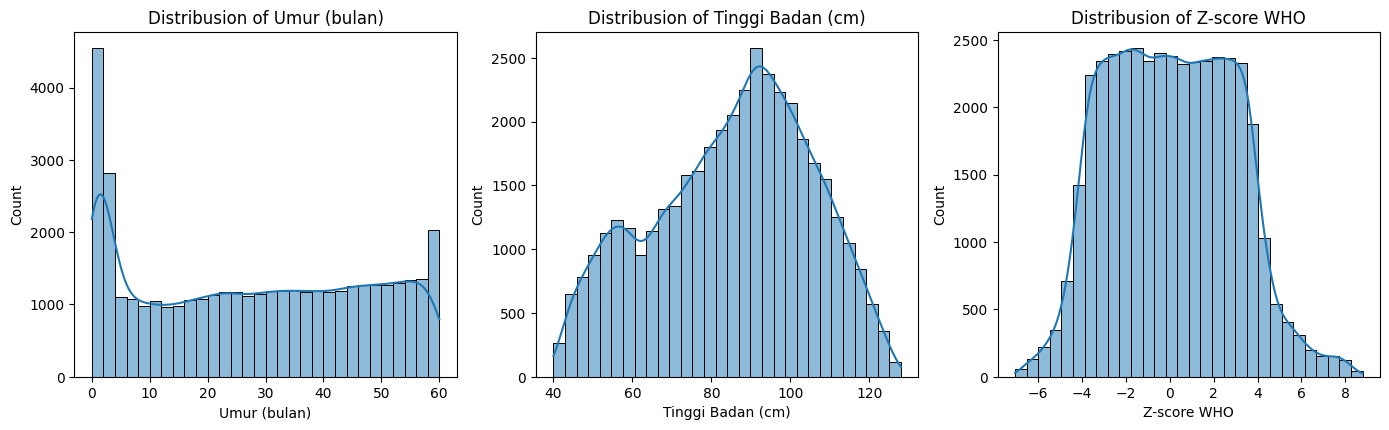

In [ ]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='#1f77b4')
    plt.title(f'Distribusion of {column}')

plt.tight_layout()
plt.show()

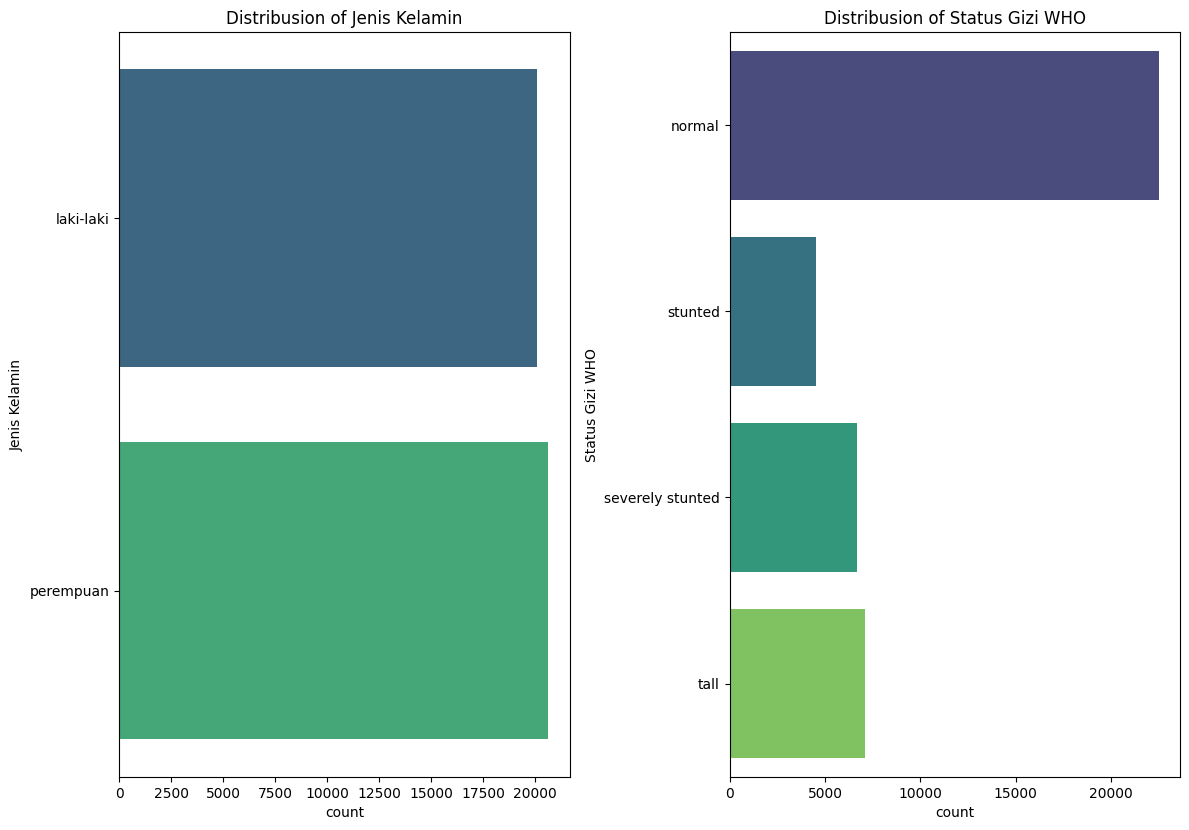

In [ ]:
cat_features = df[['Jenis Kelamin', 'Status Gizi WHO']]

plt.figure(figsize=(12, 16))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[column], palette='viridis', hue=df[column], legend=False)
    plt.title(f'Distribusion of {column}')

plt.tight_layout()
plt.show()

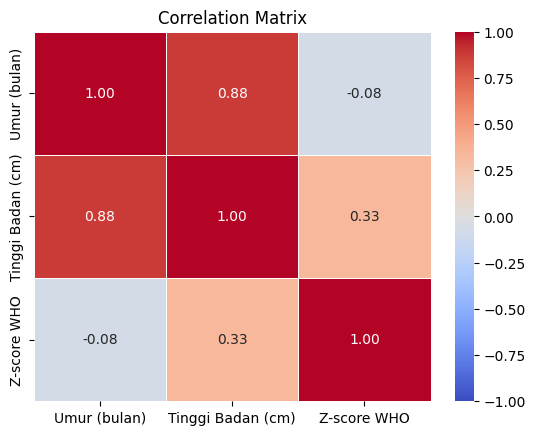

In [ ]:
plt.figure()

correlation_matrix = df.select_dtypes(include=["number"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

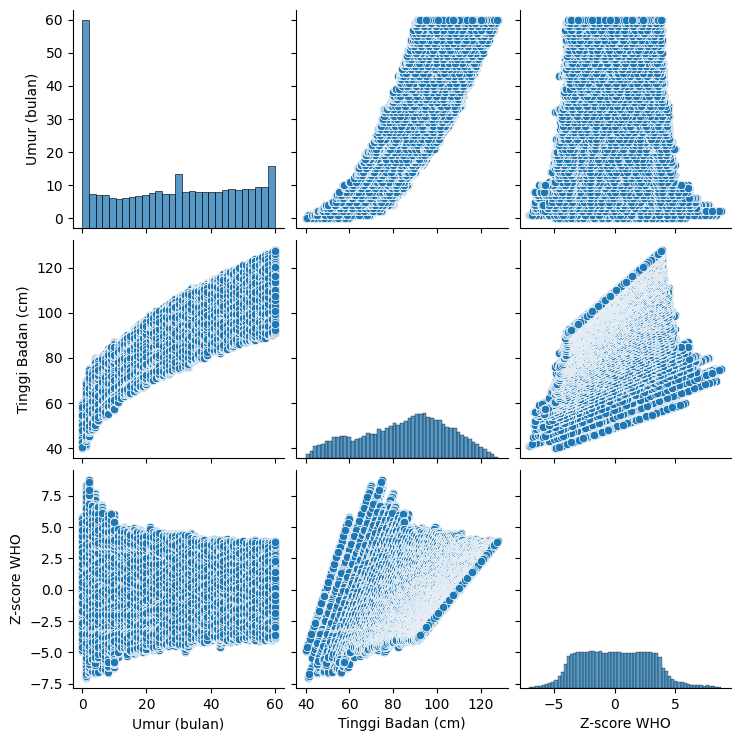

In [ ]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

### **Data Preprocessing**

In [ ]:
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
0,laki-laki,0,46.3,-1.893291,normal
1,laki-laki,0,50.5,0.325286,normal
2,laki-laki,0,45.8,-2.157408,stunted
3,laki-laki,0,49.1,-0.414240,normal
4,laki-laki,0,55.0,2.702332,normal


In [ ]:
# Scaling
standard_feature = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Z-score WHO']

standard_scaler = StandardScaler()
df[standard_feature] = standard_scaler.fit_transform(df[standard_feature])

df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
0,laki-laki,-1.42208,-1.945987,-0.698162,normal
1,laki-laki,-1.42208,-1.736217,0.083701,normal
2,laki-laki,-1.42208,-1.970959,-0.791241,stunted
3,laki-laki,-1.42208,-1.806140,-0.176920,normal
4,laki-laki,-1.42208,-1.511464,0.921412,normal


In [ ]:
# Encode
categorical_features = df.select_dtypes(include=['object']).columns

encoders = {}

for col in categorical_features:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    encoders[col] = label_encoder

df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
0,0,-1.42208,-1.945987,-0.698162,0
1,0,-1.42208,-1.736217,0.083701,0
2,0,-1.42208,-1.970959,-0.791241,2
3,0,-1.42208,-1.806140,-0.176920,0
4,0,-1.42208,-1.511464,0.921412,0


### **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop(columns=['Z-score WHO'])

In [ ]:
X = df.drop(columns=['Status Gizi WHO'])
y = df['Status Gizi WHO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (32604, 3)
Test set shape: (8151, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Evaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0            Decision Tree (DT)  0.987364   0.987325  0.987364  0.987328
1     K-Nearest Neighbors (KNN)  0.989695   0.989662  0.989695  0.989663
2            Random Forest (RF)  0.991044   0.991028  0.991044  0.991027
3  Support Vector Machine (SVM)  0.966875   0.967232  0.966875  0.966143


In [ ]:
def classy_report(model, X_test, y_test, model_name=""):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, digits=2)

    print(f"\nClassification Report {model_name}:")
    print(report)

    return report  # simpan hasil ke dict

results_report = {
    'Decision Tree (DT)': classy_report(dt, X_test, y_test, "Decision Tree (DT)"),
    'K-Nearest Neighbors (KNN)': classy_report(knn, X_test, y_test, "KNN (KNN)"),
    'Random Forest (RF)': classy_report(rf, X_test, y_test, "Random Forest (RF)"),
    'Support Vector Machine (SVM)': classy_report(svm, X_test, y_test, "SVM (SVM)"),
}



Classification Report Decision Tree (DT):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4533
           1       0.99      0.99      0.99      1341
           2       0.97      0.95      0.96       874
           3       0.99      0.99      0.99      1403

    accuracy                           0.99      8151
   macro avg       0.98      0.98      0.98      8151
weighted avg       0.99      0.99      0.99      8151


Classification Report KNN (KNN):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4533
           1       0.99      0.99      0.99      1341
           2       0.98      0.96      0.97       874
           3       0.99      0.99      0.99      1403

    accuracy                           0.99      8151
   macro avg       0.99      0.98      0.99      8151
weighted avg       0.99      0.99      0.99      8151


Classification Report Random Forest (RF):
          